In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics, preprocessing, model_selection
from sklearn.model_selection import train_test_split,cross_val_predict

from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt                                      # to plot graph
%matplotlib inline
import xgboost as xgb
import lightgbm as lgb

In [ ]:
trainset= pd.read_csv('train.csv')
testset= pd.read_csv('test.csv')

In [ ]:
trainset.shape, testset.shape

((318438, 18), (137057, 17))

In [ ]:
trainset.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [ ]:
testset.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [ ]:
trainset.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [ ]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [ ]:
submission= testset[['case_id', 'Hospital_code']].copy()

In [ ]:
trainset.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [ ]:
print(trainset['Bed Grade'].unique())
testset['Bed Grade'].value_counts(normalize= True)

[ 2.  3.  4.  1. nan]


2.0    0.385194
3.0    0.352929
4.0    0.181146
1.0    0.080732
Name: Bed Grade, dtype: float64

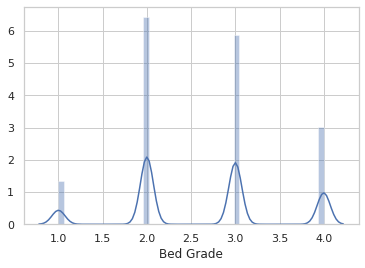

In [ ]:
sns.distplot(testset['Bed Grade'])

In [ ]:
print(testset['City_Code_Patient'].unique())
testset['City_Code_Patient'].value_counts(normalize= True)

[ 2. 17.  8.  7. 14.  1. 10. 12.  5. 15.  4. 21.  6.  9. 28. 34. 23. 22.
  3. 30. 20. 11. 26. 13. 18. 27. 19. 25. 31. 16. 29. 24. 33. 32. 37. 38.
 36. 35.]


8.0     0.385343
2.0     0.122664
1.0     0.083141
7.0     0.074064
5.0     0.064929
4.0     0.048622
9.0     0.035730
15.0    0.028120
10.0    0.026522
6.0     0.019831
12.0    0.018073
17.0    0.015738
3.0     0.011886
23.0    0.011834
14.0    0.009419
16.0    0.006807
21.0    0.005078
18.0    0.004422
13.0    0.004400
20.0    0.003845
26.0    0.003641
19.0    0.003137
25.0    0.002721
11.0    0.002006
27.0    0.001904
28.0    0.001408
24.0    0.001124
22.0    0.000941
29.0    0.000686
30.0    0.000445
34.0    0.000365
33.0    0.000314
32.0    0.000314
37.0    0.000153
36.0    0.000124
35.0    0.000102
38.0    0.000088
31.0    0.000058
Name: City_Code_Patient, dtype: float64

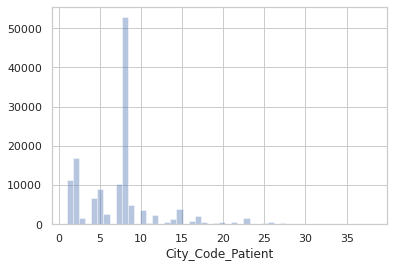

In [ ]:
sns.distplot(testset['City_Code_Patient'], kde= False)

In [ ]:
# 17 is missing from city_code_patient column
trainset['City_Code_Patient']= trainset['City_Code_Patient'].fillna(17)
testset['City_Code_Patient']= testset['City_Code_Patient'].fillna(17)

In [ ]:
trainset['Bed Grade'].fillna(trainset['Bed Grade'].mode()[0], inplace= True)
testset['Bed Grade'].fillna(trainset['Bed Grade'].mode()[0], inplace= True)

In [ ]:
testset.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64

In [ ]:
trainset.keys()

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

# **EDA**

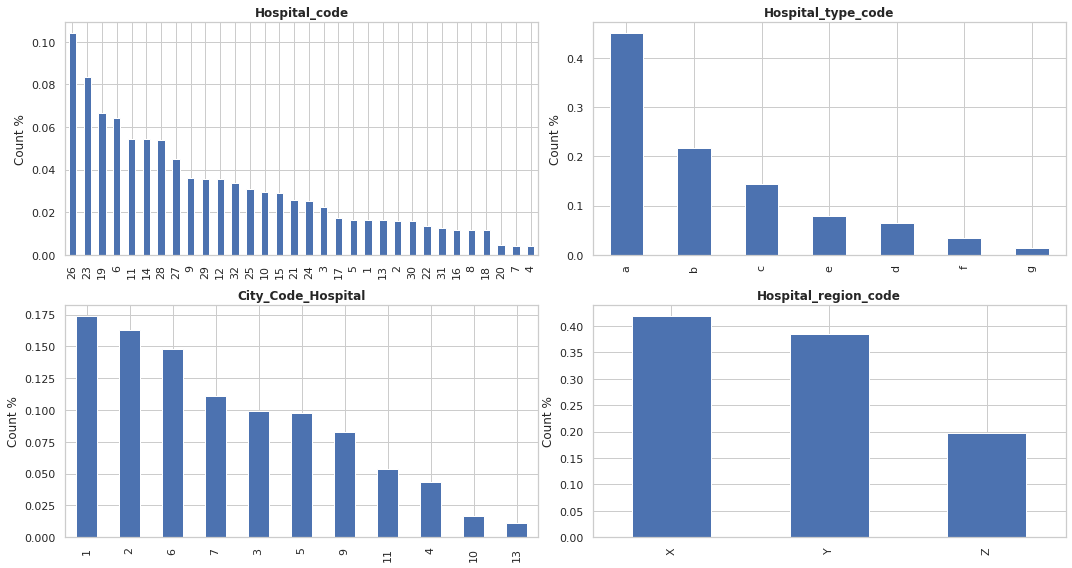

In [ ]:
plt.figure(1)
plt.subplot(221)
trainset['Hospital_code'].value_counts(normalize=True).plot.bar(figsize=(15,8))
plt.title('Hospital_code', fontweight="bold")
plt.ylabel('Count %')


plt.subplot(222)
trainset['Hospital_type_code'].value_counts(normalize=True).plot.bar(figsize=(15,8))
plt.title('Hospital_type_code', fontweight="bold")
plt.ylabel('Count %')

plt.subplot(223)
trainset['City_Code_Hospital'].value_counts(normalize=True).plot.bar(figsize=(15,8))
plt.title('City_Code_Hospital', fontweight="bold")
plt.ylabel('Count %')

plt.subplot(224)
trainset['Hospital_region_code'].value_counts(normalize=True).plot.bar(figsize=(15,8))
plt.title('Hospital_region_code', fontweight="bold")
plt.ylabel('Count %')
plt.tight_layout()

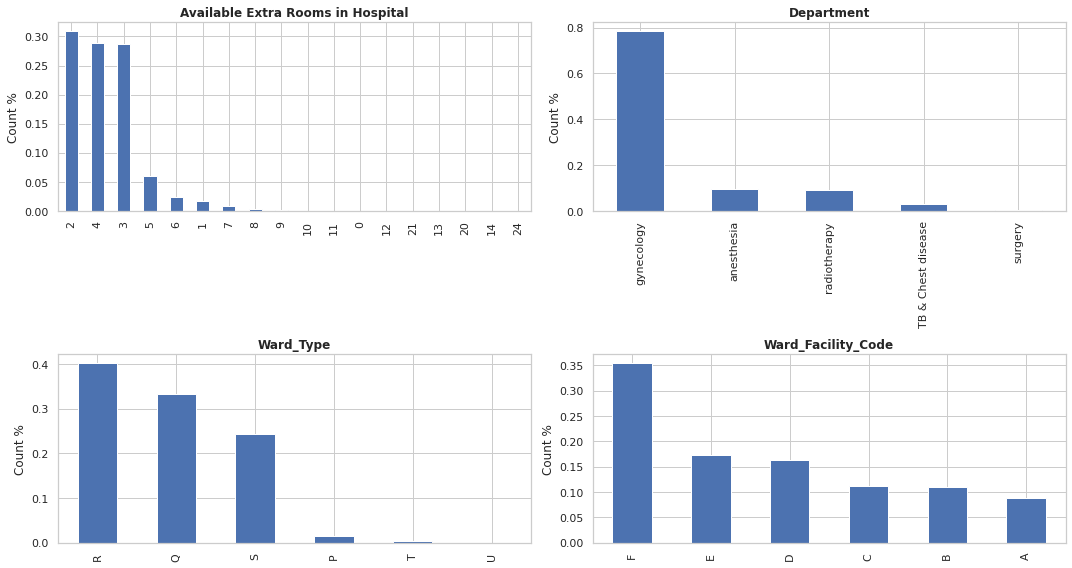

In [ ]:
plt.figure(1)
plt.subplot(221)
trainset['Available Extra Rooms in Hospital'].value_counts(normalize=True).plot.bar(figsize=(15,8))
plt.title('Available Extra Rooms in Hospital', fontweight="bold")
plt.ylabel('Count %')


plt.subplot(222)
trainset['Department'].value_counts(normalize=True).plot.bar(figsize=(15,8))
plt.title('Department', fontweight="bold")
plt.ylabel('Count %')

plt.subplot(223)
trainset['Ward_Type'].value_counts(normalize=True).plot.bar(figsize=(15,8))
plt.title('Ward_Type', fontweight="bold")
plt.ylabel('Count %')

plt.subplot(224)
trainset['Ward_Facility_Code'].value_counts(normalize=True).plot.bar(figsize=(15,8))
plt.title('Ward_Facility_Code', fontweight="bold")
plt.ylabel('Count %')
plt.tight_layout()

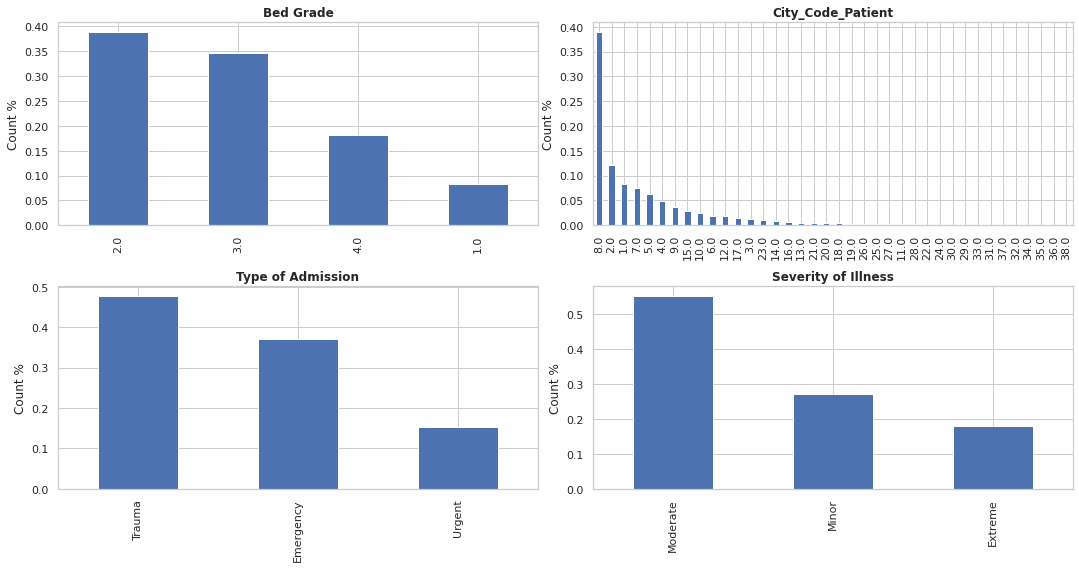

In [ ]:
plt.figure(1)
plt.subplot(221)
trainset['Bed Grade'].value_counts(normalize=True).plot.bar(figsize=(15,8))
plt.title('Bed Grade', fontweight="bold")
plt.ylabel('Count %')


plt.subplot(222)
trainset['City_Code_Patient'].value_counts(normalize=True).plot.bar(figsize=(15,8))
plt.title('City_Code_Patient', fontweight="bold")
plt.ylabel('Count %')

plt.subplot(223)
trainset['Type of Admission'].value_counts(normalize=True).plot.bar(figsize=(15,8))
plt.title('Type of Admission', fontweight="bold")
plt.ylabel('Count %')

plt.subplot(224)
trainset['Severity of Illness'].value_counts(normalize=True).plot.bar(figsize=(15,8))
plt.title('Severity of Illness', fontweight="bold")
plt.ylabel('Count %')
plt.tight_layout()

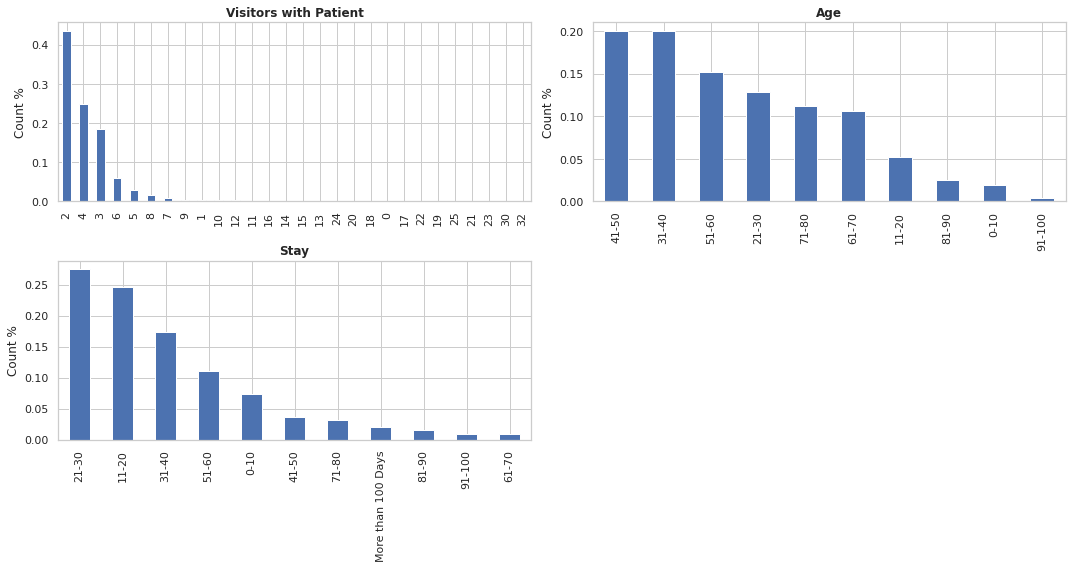

In [ ]:
plt.figure(1)
plt.subplot(221)
trainset['Visitors with Patient'].value_counts(normalize=True).plot.bar(figsize=(15,8))
plt.title('Visitors with Patient', fontweight="bold")
plt.ylabel('Count %')


plt.subplot(222)
trainset['Age'].value_counts(normalize=True).plot.bar(figsize=(15,8))
plt.title('Age', fontweight="bold")
plt.ylabel('Count %')

plt.subplot(223)
trainset['Stay'].value_counts(normalize=True).plot.bar(figsize=(15,8))
plt.title('Stay', fontweight="bold")
plt.ylabel('Count %')
plt.tight_layout()

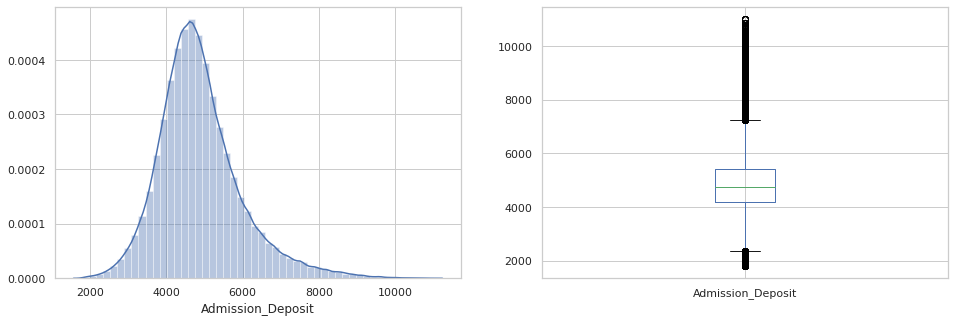

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(trainset['Admission_Deposit'])

plt.subplot(122)
trainset['Admission_Deposit'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
trainset.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

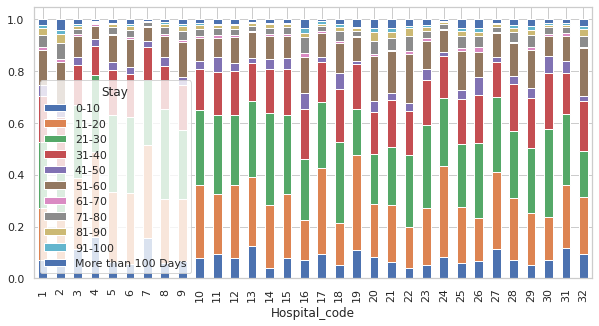

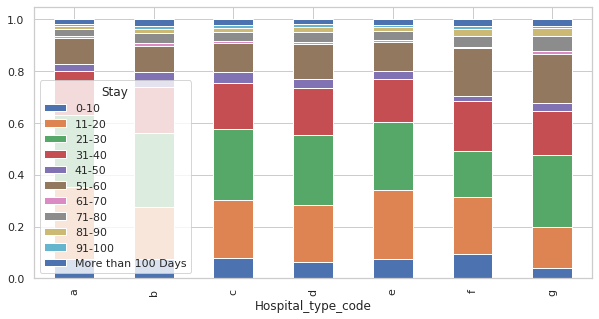

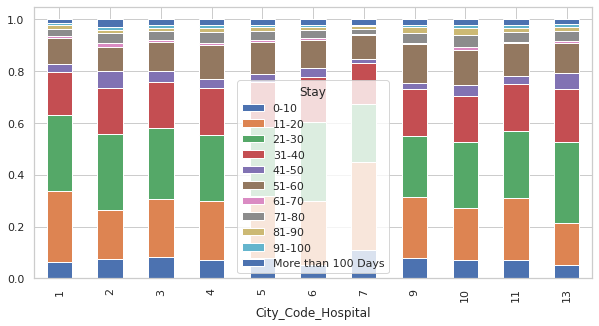

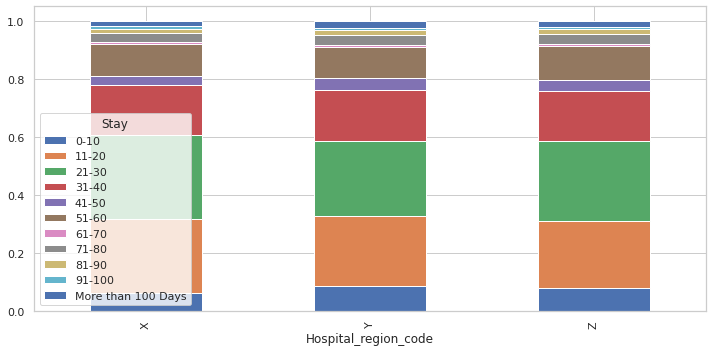

In [ ]:
#Bivariate Analysis


Hospital_code=pd.crosstab(trainset['Hospital_code'],trainset['Stay'])
Hospital_type_code=pd.crosstab(trainset['Hospital_type_code'],trainset['Stay'])
City_Code_Hospital=pd.crosstab(trainset['City_Code_Hospital'],trainset['Stay'])
Hospital_region_code=pd.crosstab(trainset['Hospital_region_code'],trainset['Stay'])



Hospital_code.div(Hospital_code.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,5))
Hospital_type_code.div(Hospital_type_code.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,5))
City_Code_Hospital.div(City_Code_Hospital.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,5))
Hospital_region_code.div(Hospital_region_code.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,5))
plt.tight_layout()



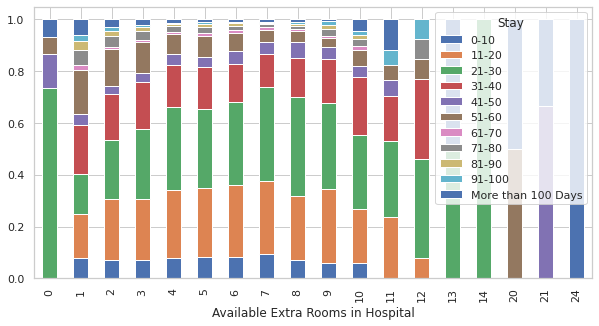

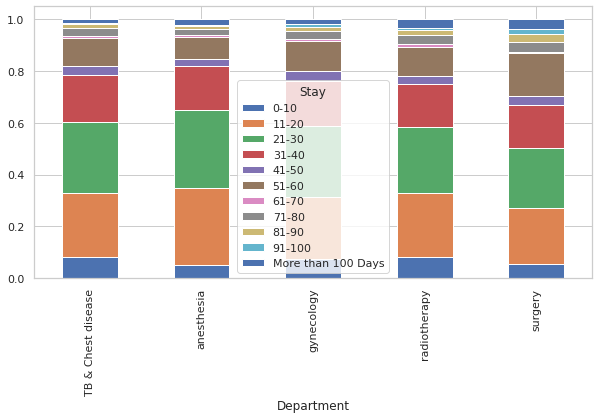

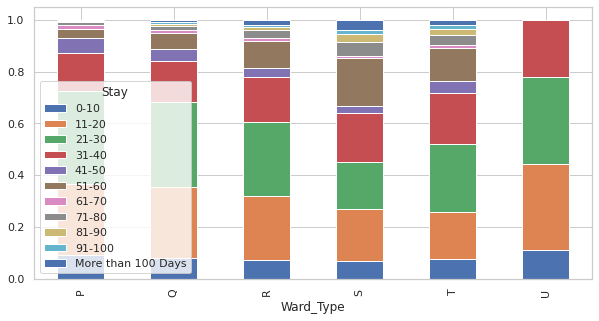

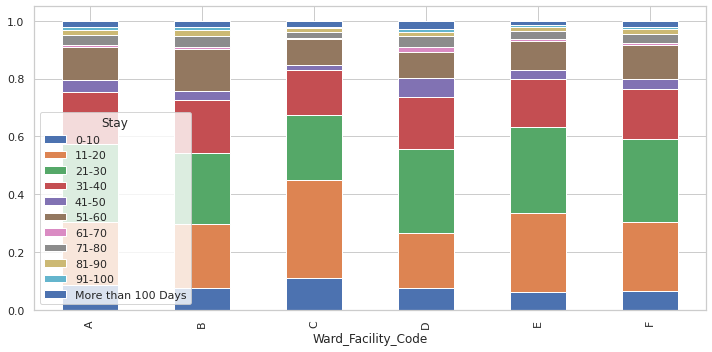

In [ ]:
#Bivariate Analysis


Extra_Rooms=pd.crosstab(trainset['Available Extra Rooms in Hospital'],trainset['Stay'])
Department=pd.crosstab(trainset['Department'],trainset['Stay'])
Ward_Type=pd.crosstab(trainset['Ward_Type'],trainset['Stay'])
Ward_Facility_Code=pd.crosstab(trainset['Ward_Facility_Code'],trainset['Stay'])



Extra_Rooms.div(Extra_Rooms.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,5))
Department.div(Department.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,5))
Ward_Type.div(Ward_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,5))
Ward_Facility_Code.div(Ward_Facility_Code.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,5))
plt.tight_layout()


In [ ]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318438 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

In [ ]:
obj_col= ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Age']

In [ ]:
trainset.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

# **Encoding**

In [ ]:
X= trainset.drop(columns= ['case_id', 'patientid', 'Stay'])
y= trainset['Stay']

In [ ]:
test= testset.drop(columns= ['case_id', 'patientid'])

In [ ]:
test.shape, X.shape

((137057, 15), (318438, 15))

In [ ]:
test.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,21,c,3,Z,3,gynecology,S,A,2.0,2.0,Emergency,Moderate,2,71-80,3095.0
1,29,a,4,X,2,gynecology,S,F,2.0,2.0,Trauma,Moderate,4,71-80,4018.0
2,26,b,2,Y,3,gynecology,Q,D,4.0,2.0,Emergency,Moderate,3,71-80,4492.0
3,6,a,6,X,3,gynecology,Q,F,2.0,2.0,Trauma,Moderate,3,71-80,4173.0
4,28,b,11,X,2,gynecology,R,F,2.0,2.0,Trauma,Moderate,4,71-80,4161.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for col in obj_col:
  X[col]= le.fit_transform(X[col])
  test[col]= le.transform(test[col])

In [ ]:
X.shape, test.shape

((318438, 15), (137057, 15))

In [ ]:
X.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,7,2,2,2,3,3,2,5,1,6,0,0,2,5,4911.0
1,1,2,4,2,2,3,3,5,1,6,1,0,2,5,5954.0
2,9,4,0,0,2,1,3,4,1,6,1,0,2,5,4745.0
3,25,1,1,1,2,3,2,3,1,6,1,0,2,5,7272.0
4,25,1,1,1,2,3,3,3,1,6,1,0,2,5,5558.0


In [ ]:
X['Admission_Deposit']= np.log(X['Admission_Deposit'])
test['Admission_Deposit']= np.log(test['Admission_Deposit'])

In [ ]:
test.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,20,2,2,2,3,2,3,0,1,1,0,2,2,7,8.037543
1,28,0,3,0,2,2,3,5,1,1,1,2,4,7,8.298540
2,25,1,1,1,3,2,1,3,3,1,0,2,3,7,8.410053
3,5,0,5,0,3,2,1,5,1,1,1,2,3,7,8.336390
4,27,1,9,0,2,2,2,5,1,1,1,2,4,7,8.333511


# **Model Building**

In [ ]:
y.head()

0     0-10
1    41-50
2    31-40
3    41-50
4    41-50
Name: Stay, dtype: object

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                  stratify=y, 
                                                  random_state=1234, 
                                                  test_size=0.20, shuffle=True)

In [ ]:
params = {}
params['learning_rate'] = 0.01
params['n_estimators'] = 1000
params['objective'] = 'multiclass'
params['boosting_type'] = 'gbdt'

In [ ]:

clf = lgb.LGBMClassifier(**params)
    
clf.fit(X_train, y_train, early_stopping_rounds=200,
        eval_set=[(X_valid, y_valid)], 
        eval_metric='multi_error', verbose=False, categorical_feature= obj_col)

eval_score = accuracy_score(y_valid, clf.predict(X_valid))

print('Eval ACC: {}'.format(eval_score))



/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Age', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Hospital', 'City_Code_Patient', 'Department', 'Hospital_code', 'Hospital_region_code', 'Hospital_type_code', 'Severity of Illness', 'Type of Admission', 'Ward_Facility_Code', 'Ward_Type']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Eval ACC: 0.42703492023615125


In [ ]:
best_iter = clf.best_iteration_
params['n_estimators'] = best_iter
print(params)


{'learning_rate': 0.01, 'n_estimators': 1204, 'objective': 'multiclass', 'boosting_type': 'gbdt'}


In [ ]:
preds = clf.predict(test)

In [ ]:
np.unique(preds, return_counts=True)

(array(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70',
        '71-80', '81-90', '91-100', 'More than 100 Days'], dtype=object),
 array([ 4017, 39282, 58660, 12015,    16, 19549,     3,   195,  1069,
           47,  2204]))

In [ ]:
submission.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [ ]:
submission['Stay']= preds

In [ ]:
submission= submission.drop(columns= 'Hospital_code')

In [ ]:
submission.to_csv('submission.csv', index= False)

In [ ]:
pip install catboost

     |████████████████████████████████| 66.1MB 55kB/s 


In [ ]:
#CatBoost
from catboost import Pool, CatBoostClassifier

In [ ]:
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.005,
    random_strength=0.1,
    depth=8,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    leaf_estimation_method='Newton'
)
train_pool = Pool(data=X_train, label=y_train)
test_pool = Pool(data=X_valid, label=y_valid) 
model.fit(train_pool,plot=True,eval_set=test_pool ,verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
eval_score = accuracy_score(y_valid, model.predict(X_valid))

print('Eval ACC: {}'.format(eval_score))

Eval ACC: 0.4095905037055646


In [ ]:
preds = model.predict(test)

In [ ]:
np.unique(preds, return_counts=True)

(array(['0-10', '11-20', '21-30', '31-40', '51-60', '71-80', '81-90',
        'More than 100 Days'], dtype=object),
 array([ 2434, 48929, 50817, 14847, 17566,     6,   318,  2140]))

In [ ]:
submission['Stay']= preds
submission.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [ ]:
submission.to_csv('submission.csv', index= False)